In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\Asus\Downloads\fishdata.csv', 
                 encoding ='unicode_escape',
                 skiprows = [1],
                 usecols = [0,1,2,3,4,5,6,7,8,9,10,11] )

C:\Users\Asus\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,year,month,day,hr,min,sec,carbon_monoxide,water_temp,external_temp,humudity,light_intensity,ph
0,2020.0,6.0,18,14,30.0,43.0,201,25.0,29.0,95.0,27.19,4.39
1,2020.0,6.0,18,14,30.0,48.0,201,25.0,29.0,95.0,27.19,4.38
2,2020.0,6.0,18,14,31.0,3.0,201,25.0,29.0,95.0,27.19,4.38
3,2020.0,6.0,18,14,31.0,8.0,201,25.0,29.0,95.0,27.19,4.41
4,2020.0,6.0,18,14,31.0,13.0,201,25.0,29.0,95.0,27.25,4.41


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811946 entries, 0 to 811945
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   year             811946 non-null  float64
 1   month            811946 non-null  float64
 2   day              811946 non-null  int64  
 3   hr               811946 non-null  int64  
 4   min              811946 non-null  float64
 5   sec              811946 non-null  float64
 6   carbon_monoxide  810198 non-null  object 
 7   water_temp       811872 non-null  float64
 8   external_temp    811851 non-null  float64
 9   humudity         811843 non-null  float64
 10  light_intensity  811843 non-null  float64
 11  ph               807408 non-null  float64
dtypes: float64(9), int64(2), object(1)
memory usage: 74.3+ MB


In [5]:
df.carbon_monoxide = pd.to_numeric(df.carbon_monoxide, errors='coerce')

In [6]:
df.fillna(method='pad', limit=1, inplace=True)

In [7]:
df.fillna(method='bfill', limit=1, inplace=True)

In [8]:
df['year'] = np.where(df.year != 2020, 2020, df.year)

In [9]:
#humidity
df['humudity'] = np.where(df.humudity != 95, 95, df.humudity)

In [10]:
df.describe().round(2)

,year,month,day,hr,min,sec,carbon_monoxide,water_temp,external_temp,humudity,light_intensity,ph
count,811946.0,811946.00,811946.00,811946.00,811946.00,811946.00,811946.00,811946.00,811946.00,811946.0,811946.00,811946.00
mean,2020.0,2.62,18.49,11.79,29.48,29.50,212.65,-65.00,30.83,95.0,28.49,82.52
std,0.0,2519.28,26.61,6.22,17.32,17.32,52.21,66.95,5.68,0.0,2.60,1638.40
min,2020.0,-1912020.00,1.00,0.00,0.00,0.00,-183.00,-240.00,-999.00,95.0,2.97,2.65
25%,2020.0,7.00,13.00,7.00,14.00,14.00,183.00,-140.00,29.00,95.0,27.06,3.85
50%,2020.0,7.00,21.00,12.00,29.00,29.00,198.00,-50.00,30.00,95.0,28.25,4.02
75%,2020.0,8.00,26.00,16.00,44.00,45.00,244.00,-19.00,32.00,95.0,30.25,4.35
max,2020.0,2020.00,22020.00,95.00,59.00,59.00,334.00,322.00,310.00,95.0,95.00,42020.00


In [11]:
monthmore12 = df.month > 12
monthless1 = df.month < 1

df.drop(df[monthmore12].index, inplace=True)
df.drop(df[monthless1].index, inplace=True)

C:\Users\Asus\miniconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [12]:
datemore31 = df.day > 31
dateless1 = df.day < 1

df.drop(df[datemore31].index, inplace=True)
df.drop(df[dateless1].index, inplace=True)

In [13]:
hrmore23 = df.hr > 23
hrless0 = df.hr < 0

df.drop(df[hrmore23].index, inplace=True)
df.drop(df[hrless0].index, inplace=True)

C:\Users\Asus\miniconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


 Q1 183.0 
 Q3 244.0 
 IQR 61.0
 Lower 91.50 
 Upper 335.50


<AxesSubplot:xlabel='carbon_monoxide'>

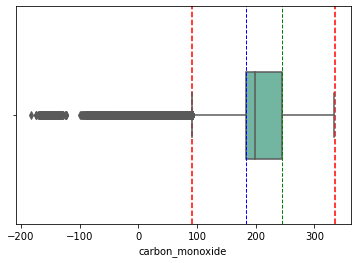

In [14]:
#carbon_monoxide
q3 = df.carbon_monoxide.quantile(.75)
q1 = df.carbon_monoxide.quantile(.25)
iqr = q3-q1

print(' Q1 {}'.format(q1),'\n', 'Q3 {}'.format(q3),'\n', 'IQR {}'.format(iqr))

upper = q3 + (1.5 * iqr)
lower = q1 - (1.5 * iqr)

print(' Lower {:.2f} \n Upper {:.2f}'.format(lower, upper))

plt.axvline(x=q1, c='b', linestyle='--', linewidth=1)
plt.axvline(x=q3, c='g', linestyle='--', linewidth=1)
plt.axvline(x=lower, c='r', linestyle='--')
plt.axvline(x=upper, c='r', linestyle='--')
sns.boxplot(df.carbon_monoxide, width=0.4, palette='Set2')

In [15]:
df[df.carbon_monoxide > upper].carbon_monoxide.count()

0

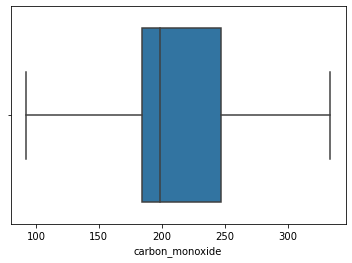

In [16]:
filter = df.carbon_monoxide > upper
df[filter]
df.drop(df[filter].index, inplace=True)
df = df[df.carbon_monoxide <= upper]
df = df[df.carbon_monoxide >= lower]
df = df[(df.carbon_monoxide <= upper) & (df.carbon_monoxide >= lower)]
sns.boxplot(df.carbon_monoxide)
plt.show()

 Q1 -140.0 
 Q3 -19.0 
 IQR 121.0
 Lower -321.50 
 Upper 162.50


<AxesSubplot:xlabel='water_temp'>

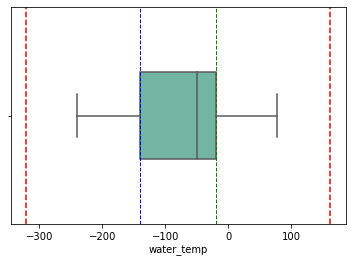

In [17]:
#water_temp
q3 = df.water_temp.quantile(.75)
q1 = df.water_temp.quantile(.25)
iqr = q3-q1

print(' Q1 {}'.format(q1),'\n', 'Q3 {}'.format(q3),'\n', 'IQR {}'.format(iqr))

upper = q3 + (1.5 * iqr)
lower = q1 - (1.5 * iqr)

print(' Lower {:.2f} \n Upper {:.2f}'.format(lower, upper))

plt.axvline(x=q1, c='b', linestyle='--', linewidth=1)
plt.axvline(x=q3, c='g', linestyle='--', linewidth=1)
plt.axvline(x=lower, c='r', linestyle='--')
plt.axvline(x=upper, c='r', linestyle='--')
sns.boxplot(df.water_temp, width=0.4, palette='Set2')

In [18]:
df[df.water_temp > upper].water_temp.count()

0

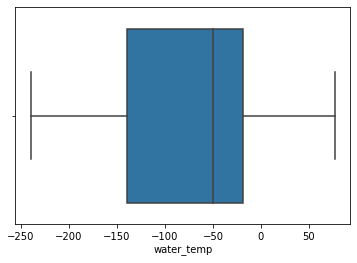

In [19]:
filter = df.water_temp > upper
df[filter]
df.drop(df[filter].index, inplace=True)
df = df[df.water_temp <= upper]
df = df[df.water_temp >= lower]
df = df[(df.water_temp <= upper) & (df.water_temp >= lower)]
sns.boxplot(df.water_temp)
plt.show()

 Q1 29.0 
 Q3 32.0 
 IQR 3.0
 Lower 24.50 
 Upper 36.50


<AxesSubplot:xlabel='external_temp'>

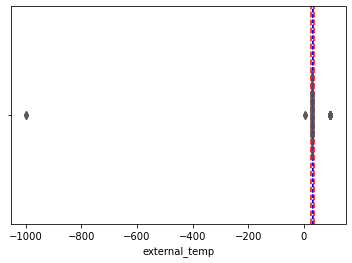

In [20]:
#external_temp
q3 = df.external_temp.quantile(.75)
q1 = df.external_temp.quantile(.25)
iqr = q3-q1

print(' Q1 {}'.format(q1),'\n', 'Q3 {}'.format(q3),'\n', 'IQR {}'.format(iqr))

upper = q3 + (1.5 * iqr)
lower = q1 - (1.5 * iqr)

print(' Lower {:.2f} \n Upper {:.2f}'.format(lower, upper))

plt.axvline(x=q1, c='b', linestyle='--', linewidth=1)
plt.axvline(x=q3, c='g', linestyle='--', linewidth=1)
plt.axvline(x=lower, c='r', linestyle='--')
plt.axvline(x=upper, c='r', linestyle='--')
sns.boxplot(df.external_temp, width=0.4, palette='Set2')

In [21]:
df[df.external_temp > upper].external_temp.count()

1105

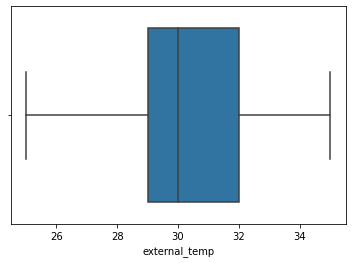

In [22]:
filter = df.external_temp > upper
df[filter]
df.drop(df[filter].index, inplace=True)

df = df[df.external_temp <= upper]
df = df[df.external_temp >= lower]
df = df[(df.external_temp <= upper) & (df.external_temp >= lower)]
sns.boxplot(df.external_temp)
plt.show()

 Q1 27.06 
 Q3 30.25 
 IQR 3.1900000000000013
 Lower 22.27 
 Upper 35.04


<AxesSubplot:xlabel='light_intensity'>

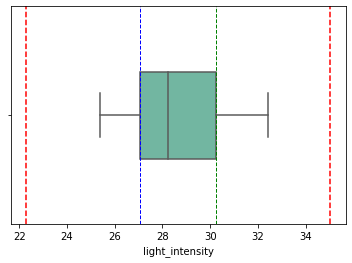

In [23]:
#light_intensity
q3 = df.light_intensity.quantile(.75)
q1 = df.light_intensity.quantile(.25)
iqr = q3-q1

print(' Q1 {}'.format(q1),'\n', 'Q3 {}'.format(q3),'\n', 'IQR {}'.format(iqr))

upper = q3 + (1.5 * iqr)
lower = q1 - (1.5 * iqr)

print(' Lower {:.2f} \n Upper {:.2f}'.format(lower, upper))

plt.axvline(x=q1, c='b', linestyle='--', linewidth=1)
plt.axvline(x=q3, c='g', linestyle='--', linewidth=1)
plt.axvline(x=lower, c='r', linestyle='--')
plt.axvline(x=upper, c='r', linestyle='--')
sns.boxplot(df.light_intensity, width=0.4, palette='Set2')

In [24]:
df[df.light_intensity > upper].light_intensity.count()

0

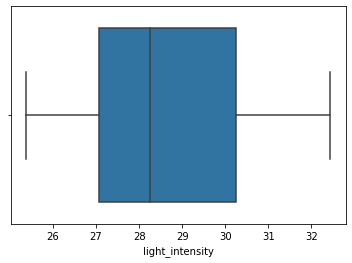

In [25]:
filter = df.light_intensity > upper
df[filter]
df.drop(df[filter].index, inplace=True)

df = df[df.light_intensity <= upper]
df = df[df.light_intensity >= lower]
df = df[(df.light_intensity <= upper) & (df.light_intensity >= lower)]
sns.boxplot(df.light_intensity)
plt.show()

 Q1 3.85 
 Q3 4.36 
 IQR 0.5100000000000002
 Lower 3.08 
 Upper 5.13


<AxesSubplot:xlabel='ph'>

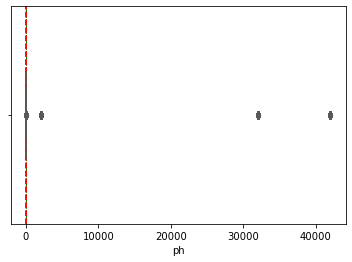

In [26]:
#ph
q3 = df.ph.quantile(.75)
q1 = df.ph.quantile(.25)
iqr = q3-q1

print(' Q1 {}'.format(q1),'\n', 'Q3 {}'.format(q3),'\n', 'IQR {}'.format(iqr))

upper = q3 + (1.5 * iqr)
lower = q1 - (1.5 * iqr)

print(' Lower {:.2f} \n Upper {:.2f}'.format(lower, upper))

plt.axvline(x=q1, c='b', linestyle='--', linewidth=1)
plt.axvline(x=q3, c='g', linestyle='--', linewidth=1)
plt.axvline(x=lower, c='r', linestyle='--')
plt.axvline(x=upper, c='r', linestyle='--')
sns.boxplot(df.ph, width=0.4, palette='Set2')

In [27]:
df[df.ph > upper].ph.count()

5885

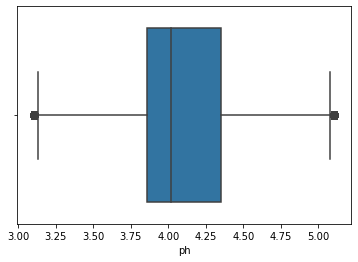

In [28]:
filter = df.ph > upper
df[filter]
df.drop(df[filter].index, inplace=True)

df = df[df.ph <= upper]
df = df[df.ph >= lower]
df = df[(df.ph <= upper) & (df.ph >= lower)]
sns.boxplot(df.ph)
plt.show()

In [29]:
df.year = df.year.astype('int')
df.month = df.month.astype('int')
df.day = df.day.astype('int')
df.hr = df.hr.astype('int')
df['min'] = df['min'].astype('int')
df.sec = df.sec.astype('int')

In [30]:
df.head(3)

,year,month,day,hr,min,sec,carbon_monoxide,water_temp,external_temp,humudity,light_intensity,ph
0,2020,6,18,14,30,43,201.0,25.0,29.0,95.0,27.19,4.39
1,2020,6,18,14,30,48,201.0,25.0,29.0,95.0,27.19,4.38
2,2020,6,18,14,31,3,201.0,25.0,29.0,95.0,27.19,4.38


In [31]:
df.iloc[:,0:6] = df.iloc[:,0:6].astype('category')

In [32]:
df.corr()

,carbon_monoxide,water_temp,external_temp,humudity,light_intensity,ph
carbon_monoxide,1.000000,-0.088690,-0.089975,NaN,0.260387,0.738634
water_temp,-0.088690,1.000000,0.340301,NaN,0.248473,-0.069621
external_temp,-0.089975,0.340301,1.000000,NaN,0.847647,-0.298969
humudity,NaN,NaN,NaN,NaN,NaN,NaN
light_intensity,0.260387,0.248473,0.847647,NaN,1.000000,-0.043544
ph,0.738634,-0.069621,-0.298969,NaN,-0.043544,1.000000


<AxesSubplot:>

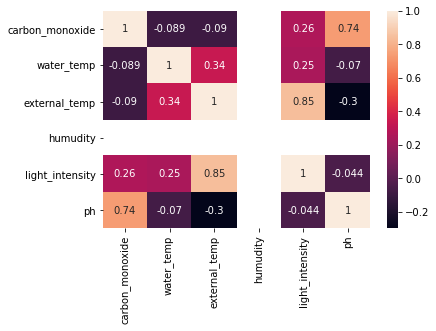

In [33]:
corr_val = df.corr()
sns.heatmap(corr_val, annot=True)